# Distribución t

La distribución t (de Student) es una distribución de probabilidad que surge del problema de estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es **pequeño**. Para saber que los datos de la población siguen una distribución normal podemos realizar diversos contrastes llamados de bondad de ajuste, de los cuales, el más usado, es la prueba de **Kolmogorov**.

Cuando extraemos una muestra de una población con distribución normal, la media de la muestra puede compararse con la media de la población usando un valor **t**:

$$
t = \frac{\overline{x} - {\mu}}{\frac{s}{\sqrt{n}}}
$$

El **valor t** puede entonces asociarse con una probabilidad acumulada única que representa la posibilidad de que, *dada una muestra aleatoriamente extraída de la población de tamaño n* la media de la muestra sea **igual**, **menor** o **mayor**, a la media de la población.


### Diferencias entre la distribución t y la distribución normal

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importamos la biblioteca necesaria para enlazar con el archivo requerido
import sys
sys.path.insert(0, '../statistics')
                
# R functions
from R_Functions import *

In [2]:
# distribución t
x01 = stats.t.rvs(df=2, size=200, random_state=42)
x02 = stats.t.rvs(df=200, size=200, random_state=42)
y01 = stats.t.pdf(x=x01, df=2)
y02 = stats.t.pdf(x=x02, df=200)

# distribución normal
x10 = stats.norm.rvs(size=200, random_state=42)
y10 = stats.norm.pdf(x=x10)

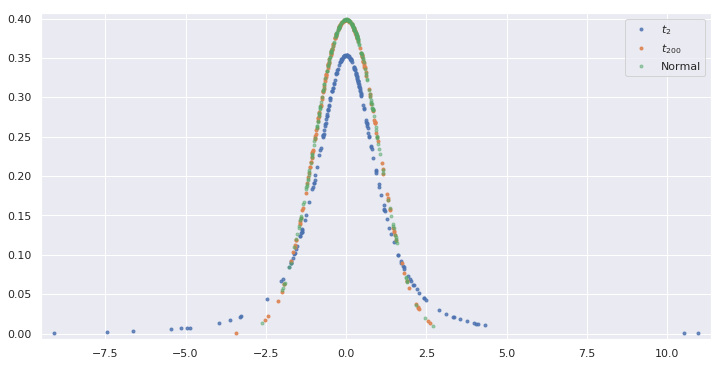

In [3]:
# draw
plt.figure(figsize=(12,6))
plt.plot(x01, y01, marker='.', linestyle='none', label ='$t_{2}$', alpha=0.8)
plt.plot(x02, y02, marker='.', linestyle='none', label ='$t_{200}$', alpha=0.9)
plt.plot(x10, y10, marker='.', linestyle='none', label ='Normal', alpha=0.5)
plt.margins(0.02)
plt.legend()
plt.show()

Podemos observar que las colas de la distribución t son más alargadas, lo cual indica que hay mayor probabilidad de obtener valores en los extremos de la distribución, concretamente a $2 \cdot \sigma$.

Esto implica que los **intervalos de confianza** construidos bajo una *distribución t* van a ser más amplios, o en otras palabras, más conservativos que los obtenidos bajo una distribución normal.

* La *distribución t* está siempre centrada en cero.
* Tiene un parámetro llamado **grados de libertad** que determina la anchura de las colas. Cuando tienden a infinito, la distribución es normal.

Conforme va incrementando los grados de libertad, la *distribución t* se aproxima a una *distribución normal*

We can use the `pt()` function to find probabilitues under the *t-distribution*. For a given cutoff value `q` and a given degrees of freedom `df`, `pt(q, df)` gives us the probability under the *t-distribution* with `df` degrees of freedom for values of `t` less than `q`. 

In other words, $P(t_{df} < T) = pt(q = T, df)$

In [4]:
#Calculate the cumulative of the t-distribution
stats.t.cdf(3, df=10), pt(3, 10)

(0.9933281724887152, 0.9933281724887152)

We can use the `qt()` function to find *cutoffs* under the *t-distribution*. For a given probability `p` and a given degrees of freedom `df`. `qt(p, df)` gives us the cutoff value for the *t-distribution* with `df` degrees of freedom for which probability under the curve is `p`.

In other words, $P(t_{df} < T) = p$ then $T = qt(p, df)$. For example, if $T$ corresponds to the 95th percentile of a distribution, $P = 0.95$. The middle 95% means from $p = 0.025$ to $p = 0.975$

In [5]:
# Calculate the quantile function of the t-distribution
stats.t.ppf(0.95, df = 10), qt(0.95, df = 10)

(1.8124611228107335, 1.8124611228107335)

# Estimando usando la distribución t

## Condiciones para usar la distribución t

* **Independecia de las variables/observaciones**. 
* **Las observaciones provienen de una población con distribución normal**

### Intervalos de confianza para distribuciones univariantes (una variable)

Usemos un ejemplo:

Los delfines están en la cima de la cadena trófica oceánica, por lo tanto la injesta de metales pesados les afecta enormemente, concentrándose en sus órganos y músculos.

Vamos a identificar un intervalo de confianza para la media de mercurio contenido en los músculos de una muestra de 19 delfines.

| n | $\overline{x}$ | s | min | max |
|---|----------------|---|-----|-----|
|19 | 4.4            |2.3|1.7  |9.2  |

* Las observaciones son una muestra aleatoria simple, y consisten en menos del 10% de la muestra, por lo tanto, la independencia es razonable.
* La tabla anterior no sugiere que exista ningún sesgo o valores atípicos; todas las observaciones están dentro de las $2.5 \sigma$ desviaciones estándar de la media.

Basado en estas evidencias, la suposición de normalidad parece razonable.

-----> Hasta aquí

Vamos a aprender a obtener los intervalos de confianza para la media de una muestra usando la *distribucion t*

Supongamos que tenemos una muestra de 100 personas, de las cuales, 13 son zurdas. Si tu seleccionas otra muestra aleatoria de 100 personas, ¿te sorprenderías si solo 12 personas son zurdas? ¿Y si hubieran 15 personas? ¿o 30? ¿y 1 o 90 personas?

Mientras que haya 12 o 15 personas zurdas en las siguientes muestras es algo probable, el hecho que haya 1 o 90 personas es improbable. Pero no sabríamos contestar en el caso de 30 personas, por ejemplo.

Por tanto necesitamos cuantificar como de variable puede ser la muestra. Tenemos varias opciones:

* Bootstrapping
* Aproximar con el teorema central del límite

Ahora nos centraremos en este último método. Para ello la variable debe de cumplir unas ciertas condiciones:

* Las observaciones tienen que ser independientes
   * random sampling / assignament
   * if sampling without replacement, n < 10% of population
* Tamaño de la muestra / sesgo. 

In [6]:
df = pd.read_csv('data/michelson_speed_of_light.csv', index_col=0)
df_speed = df['velocity of light in air (km/s)'].values

Calculamos el error estándar o *SE*
$$
\frac{\sigma}{\sqrt{n}}
$$

In [14]:
se = np.std(df_speed) / np.sqrt(df_speed.size)

print(se)

7.861450247886836


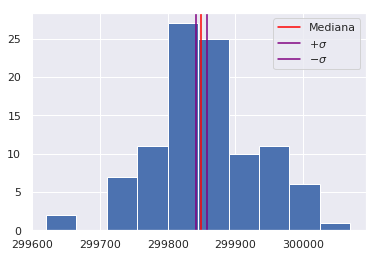

In [15]:
plt.hist(df_speed, bins=int(np.sqrt(len(df_speed))))
plt.axvline(np.median(df_speed), color='red', label='Mediana')
# Desviación estándar
plt.axvline(np.median(df_speed) + se,
            color='purple', label='$+\sigma$')
plt.axvline(np.median(df_speed) - se,
            color='purple', label='$-\sigma$')
plt.legend()
plt.show()

In [9]:
# Intervalos de confianza usando la distribución t
import statsmodels.stats.api as sms

# using statsmodels
conf1, conf2 = sms.DescrStatsW(df_speed).tconfint_mean(alpha=0.05)

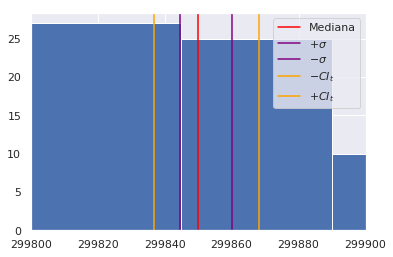

In [42]:
plt.hist(df_speed, bins=int(np.sqrt(len(df_speed))))
plt.axvline(np.median(df_speed), color='red', label='Mediana')
# Desviación estándar
plt.axvline(np.mean(df_speed) + se,
            color='purple', label='$+\sigma$')
plt.axvline(np.mean(df_speed) - se,
            color='purple', label='$-\sigma$')
# Intervalos de confianza calculados con t-test
plt.axvline(conf1, color='orange', label='$-CI_{t}$')
plt.axvline(conf2, color='orange', label='$+CI_{t}$')
plt.xlim(left=299800, right=299900)
plt.legend()
plt.show()

Podemos ver que efectivamente, los intervalos de confianza calculados mediante la distribución t, son más conservadores que los calculados mediante el error estándar.

#### Otro ejemplo usando el dataset "General Social Survey"

In [17]:
# data
gss = pd.read_csv('../Datasets/general_social_survey/gss_moredays.csv')

In [21]:
# 95 percent confidence interval
sms.DescrStatsW(gss.values).tconfint_mean()

(array([5.27336667]), array([6.14773185]))

## Prueba-t para dos muestras emparejadas

Podemos usar el t-test, para probar si dos variables están o no emparejadas.

Vamos a continuar nuestra exploración de los precios de los libros de la UCLA y Amazon. La variable `diff` es la diferencia entre los precios de cada plataforma.

In [11]:
textbooks = pd.read_csv('../Datasets/textbooks/textbooks.txt',
                        sep='\t')
textbooks.head()

,deptAbbr,course,ibsn,uclaNew,amazNew,more,diff
0,Am Ind,C170,978-0803272620,27.67,27.95,Y,-0.28
1,Anthro,9,978-0030119194,40.59,31.14,Y,9.45
2,Anthro,135T,978-0300080643,31.68,32.00,Y,-0.32
3,Anthro,191HB,978-0226206813,16.00,11.52,Y,4.48
4,Art His,M102K,978-0892365999,18.95,14.21,Y,4.74


Cuando dos conjuntos de observaciones tienen esta correspondencia especial (no son independientes), se dice que están emparejadas.

Para analizar los datos emparejados, a menudo es útil observar la diferencia en los resultados de cada par de observaciones.

Nuestro objetivo es construir un intervalo de confianza del 95% para la diferencia de medias de las puntuaciones medias de lectura y escritura.

Intervalo de confianza del 95% para la media de precios.

In [13]:
sms.DescrStatsW(textbooks['diff'].values).tconfint_mean()

(9.435636081165885, 16.08765159006699)

### Interpretación

Una interpreatación estándar diría algo similar a que el intervalo de confianza del 95% para la diferencia de medias es $(9.43, 16.09)$.

Pero una buena interpretación debe transmitir direccionalidad, es decir, decirnos qué grupo es más grande que el otro. En este caso, estamos 95% seguros de que el precio medio es $9.43$ más bajo que $16.09$ más alto que el precio medio.